# DEA Coastlines summary plots

In [1]:
cd ../'Tools'

/home/jovyan/dev/dea-notebooks/Tools


In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from dea_tools.coastal import get_coastlines

## Load data

In [7]:
# Set study area from vector file
regions_gdf = (
    gpd.read_file(
        # "https://data.dea.ga.gov.au/derivative/dea_coastlines/supplementary/australia_mainland_regions.geojson"
        # '/home/jovyan/dev/dea-notebooks/Testing/Buffered_GBR_mngt_areas.shp' ## Management area polygons
        '/home/jovyan/dev/dea-notebooks/Testing/Manual_all_GBR_Coastlines.shp' ## Greater GBR extent
    )
    # .set_index("Descriptio")
    .set_index("layer")
)
regions_gdf

,id,path,geometry
layer,,,
Manual_all_GBR_Coastlines_area1,1,C:/Users/u69031/OneDrive - Geoscience Australi...,"POLYGON ((154.00101 -24.49839, 152.04124 -24.4..."


In [8]:
study_area = regions_gdf.loc[["Manual_all_GBR_Coastlines_area1"]]

In [9]:
# Load data from WFS for study area bounding box
bbox = study_area.geometry.bounds.values[0]
# bbox = study_area.geometry.bounds#.values[0]
ratesofchange_gdf = get_coastlines(
    bbox=bbox, layer="rates_of_change"
)

# Clip returned data to polygon extent
ratesofchange_gdf = gpd.clip(ratesofchange_gdf, mask=study_area.to_crs("EPSG:3577"))
ratesofchange_gdf.head()

,id,uid,rate_time,sig_time,se_time,outl_time,dist_1988,dist_1989,dist_1990,dist_1991,...,angle_std,valid_obs,valid_span,sce,nsm,max_year,min_year,certainty,id_primary,geometry
317950,rates_of_change.1199380,r7sheu4wj6,1.07,0.011,0.40,2022,-85.35,-85.38,-88.28,-75.75,...,10,34,34,86.41,85.35,2019,2012,baseline outlier,QLD15,POINT (2000851.727 -2803663.727)
317951,rates_of_change.1199381,r7sheu4x0z,1.29,0.004,0.41,None,-83.83,-80.88,-85.33,-71.65,...,9,35,35,106.96,83.83,2022,2012,good,QLD15,POINT (2000835.916 -2803638.205)
317952,rates_of_change.1199382,r7sheu627g,1.20,0.006,0.41,None,-81.56,-76.79,-80.38,-64.87,...,10,35,35,104.53,81.56,2022,2012,good,QLD15,POINT (2000818.707 -2803613.637)
317953,rates_of_change.1199383,r7sheu61qy,1.10,0.011,0.41,None,-75.76,-69.09,-69.37,-61.37,...,10,35,35,99.56,75.76,2022,2012,good,QLD15,POINT (2000800.724 -2803589.631)
317954,rates_of_change.1199384,r7sheu64d5,0.97,0.020,0.39,None,-71.82,-64.09,-65.70,-57.12,...,9,35,35,95.74,71.82,2022,2012,good,QLD15,POINT (2000783.921 -2803564.747)


In [ ]:
## Temp: testing epoch based analyses

# # Load data from WFS for study area bounding box
# bbox = study_area.geometry.bounds.values[0]
# ratesofchange_gdf = get_coastlines(
#     bbox=bbox, layer="rates_of_change"
# )

# # Drop extra date columns
# labels = ['dist_1988', 'dist_1989', 'dist_1990', 'dist_1991', 'dist_1992',
#        'dist_1993', 'dist_1994', 'dist_1995', 'dist_1996', 'dist_1997',
#        'dist_1998', 'dist_1999', 'dist_2000', 'dist_2001', 'dist_2002',
#        'dist_2003', 'dist_2004', 'dist_2005', 'dist_2006', 'dist_2007',
#        'dist_2008', 'dist_2009', 'dist_2010', 'dist_2011', 'dist_2012',
#        'dist_2013', 'dist_2014', 'dist_2015', 'dist_2016', 'dist_2017']
# ratesofchange_gdf_18_22 = ratesofchange_gdf.drop(labels=labels, axis=1)


# # Clip returned data to polygon extent
# ratesofchange_gdf_18_22 = gpd.clip(ratesofchange_gdf_18_22, mask=study_area.to_crs("EPSG:3577"))
# ratesofchange_gdf_18_22.head()

# ratesofchange_gdf.iloc[0].loc['dist_2021']
ratesofchange_gdf.iloc[0].loc['dist_1988':'dist_2022']

In [50]:
## Temp
# Optional: Keep only rates of change points with "good" certainty 
# (i.e. no poor quality flags)
# ratesofchange_gdf = ratesofchange_gdf.query("certainty == 'good'")

x=np.arange(1988, 2023, 1).reshape(-1,1)
y=ratesofchange_gdf.iloc[-1].loc['dist_1988':'dist_2022'].values

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x,y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions

In [114]:
x=np.arange(1988, 2023, 1).reshape(-1,1)
y=ratesofchange_gdf.iloc[-3760].loc['dist_1988':'dist_2022']#.dropna().values


if pd.isnull(y).any() == True:
    x= np.delete(x, np.argwhere(y.values!=y.values)[0][0])
    y= y.dropna().values
else:
    y = y.values
    
print(len(y))
print(len(x))

34
34


array([7.73, 7.63, 7.17, 5.19, -2.76, -1.99, 8.78, 7.68, 6.32, 9.07, 9.29,
       9.61, 10.32, 8.64, 5.76, 6.5, 6.17, 8.5, 5.51, 4.21, 2.03, 3.86,
       7.98, 5.92, 4.85, 5.42, 4.6, 6.53, 3.26, 4.68, 6.13, 5.2, 6.32, 0],
      dtype=object)

In [109]:
np.argwhere(y.values!=y.values)[0][0]
# type(y.values)
# y.values!=y.values

6

In [ ]:
## Temp
linear_regressor.fit(x,y)

print(linear_regressor.intercept_)
print(linear_regressor.coef_)

In [ ]:
## Temp

plt.scatter(x,y)
plt.plot(x,Y_pred, color='red')
plt.show()

In [124]:
z = np.array([0,1,2,np.nan,4,np.nan])

np.argwhere(z!=z).flatten(order='C')

array([3, 5])

In [142]:
## Temp: gpd.apply
linear_regressor = LinearRegression()
x=np.arange(2014, 2019, 1).reshape(-1,1)


def epoch_rate_time(x,y,linear_regressor):
    
    # If Nans in 'y', remove them and their equivalent indexed values from 'x'
    if pd.isnull(y).any() == True:
        x= np.delete(x, np.argwhere(y.values!=y.values).flatten(order='C')).reshape(-1,1)
        y= y.dropna().values
    else:
        y = y.values
    
    linear_regressor.fit(x,y)
    return linear_regressor.coef_[0]
    
ratesofchange_gdf['2014-2018_epoch_rate_time'] = ratesofchange_gdf.apply(lambda y: epoch_rate_time(x,
                                                                                         y.loc['dist_2014':'dist_2018'],
                                                                                         linear_regressor), axis=1)
ratesofchange_gdf

,id,uid,rate_time,sig_time,se_time,outl_time,dist_1988,dist_1989,dist_1990,dist_1991,...,nsm,max_year,min_year,certainty,id_primary,geometry,y_coord,x_coord,epoch_rate_time,2014-2018_epoch_rate_time
317951,rates_of_change.1199381,r7sheu4x0z,1.37,0.004,0.41,None,-83.83,-80.88,-85.33,-71.65,...,83.83,2022,2012,good,QLD15,POINT (2000835.916 -2803638.205),-2.803638e+06,2.000836e+06,[1.3691064425770307],7.635
317952,rates_of_change.1199382,r7sheu627g,1.28,0.006,0.41,None,-81.56,-76.79,-80.38,-64.87,...,81.56,2022,2012,good,QLD15,POINT (2000818.707 -2803613.637),-2.803614e+06,2.000819e+06,[1.2800056022408963],8.694
317953,rates_of_change.1199383,r7sheu61qy,1.18,0.011,0.41,None,-75.76,-69.09,-69.37,-61.37,...,75.76,2022,2012,good,QLD15,POINT (2000800.724 -2803589.631),-2.803590e+06,2.000801e+06,[1.181075630252101],8.885
317954,rates_of_change.1199384,r7sheu64d5,1.05,0.020,0.39,None,-71.82,-64.09,-65.70,-57.12,...,71.82,2022,2012,good,QLD15,POINT (2000783.921 -2803564.747),-2.803565e+06,2.000784e+06,[1.0465350140056022],8.428
317955,rates_of_change.1199385,r7sheu3gv8,0.89,0.042,0.38,None,-67.56,-61.91,-63.52,-53.80,...,67.56,2022,2012,good,QLD15,POINT (2000768.029 -2803539.252),-2.803539e+06,2.000768e+06,[0.8949327731092437],8.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123581,rates_of_change.846595,rnj75mu4r8,0.18,0.129,0.07,None,6.75,5.33,4.68,2.58,...,-6.75,1999,1995,good,QLD04,POINT (1179906.790 -1171287.214),-1.171287e+06,1.179907e+06,[0.18510364145658265],0.301
123584,rates_of_change.846598,rnj75mu5yd,0.09,0.878,0.06,None,11.12,5.35,7.90,3.79,...,-11.12,1996,2022,good,QLD04,POINT (1179905.246 -1171258.017),-1.171258e+06,1.179905e+06,[0.08956302521008405],0.350
123586,rates_of_change.846600,rnj75mujm5,0.08,0.952,0.06,None,11.24,7.42,9.53,5.58,...,-11.24,1996,2022,good,QLD04,POINT (1179900.447 -1171229.104),-1.171229e+06,1.179900e+06,[0.08331652661064427],0.634
123588,rates_of_change.846602,rnj75munf9,0.10,0.695,0.05,None,7.14,7.20,7.31,5.86,...,-7.14,1996,2022,good,QLD04,POINT (1179890.043 -1171201.821),-1.171202e+06,1.179890e+06,[0.0995294117647059],0.614


In [143]:
## Temp: gpd.apply
linear_regressor = LinearRegression()
x=np.arange(2019, 2023, 1).reshape(-1,1)


def epoch_rate_time(x,y,linear_regressor):
    
    # If Nans in 'y', remove them and their equivalent indexed values from 'x'
    if pd.isnull(y).any() == True:
        x= np.delete(x, np.argwhere(y.values!=y.values).flatten(order='C')).reshape(-1,1)
        y= y.dropna().values
    else:
        y = y.values
    
    linear_regressor.fit(x,y)
    return linear_regressor.coef_[0]
    
ratesofchange_gdf['2019-2022_epoch_rate_time'] = ratesofchange_gdf.apply(lambda y: epoch_rate_time(x,
                                                                                         y.loc['dist_2019':'dist_2022'],
                                                                                         linear_regressor), axis=1)
ratesofchange_gdf

,id,uid,rate_time,sig_time,se_time,outl_time,dist_1988,dist_1989,dist_1990,dist_1991,...,nsm,max_year,min_year,certainty,id_primary,geometry,y_coord,x_coord,epoch_rate_time,2014-2018_epoch_rate_time
317951,rates_of_change.1199381,r7sheu4x0z,1.37,0.004,0.41,None,-83.83,-80.88,-85.33,-71.65,...,83.83,2022,2012,good,QLD15,POINT (2000835.916 -2803638.205),-2.803638e+06,2.000836e+06,[1.3691064425770307],4.682
317952,rates_of_change.1199382,r7sheu627g,1.28,0.006,0.41,None,-81.56,-76.79,-80.38,-64.87,...,81.56,2022,2012,good,QLD15,POINT (2000818.707 -2803613.637),-2.803614e+06,2.000819e+06,[1.2800056022408963],4.160
317953,rates_of_change.1199383,r7sheu61qy,1.18,0.011,0.41,None,-75.76,-69.09,-69.37,-61.37,...,75.76,2022,2012,good,QLD15,POINT (2000800.724 -2803589.631),-2.803590e+06,2.000801e+06,[1.181075630252101],4.187
317954,rates_of_change.1199384,r7sheu64d5,1.05,0.020,0.39,None,-71.82,-64.09,-65.70,-57.12,...,71.82,2022,2012,good,QLD15,POINT (2000783.921 -2803564.747),-2.803565e+06,2.000784e+06,[1.0465350140056022],4.142
317955,rates_of_change.1199385,r7sheu3gv8,0.89,0.042,0.38,None,-67.56,-61.91,-63.52,-53.80,...,67.56,2022,2012,good,QLD15,POINT (2000768.029 -2803539.252),-2.803539e+06,2.000768e+06,[0.8949327731092437],3.828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123581,rates_of_change.846595,rnj75mu4r8,0.18,0.129,0.07,None,6.75,5.33,4.68,2.58,...,-6.75,1999,1995,good,QLD04,POINT (1179906.790 -1171287.214),-1.171287e+06,1.179907e+06,[0.18510364145658265],-2.921
123584,rates_of_change.846598,rnj75mu5yd,0.09,0.878,0.06,None,11.12,5.35,7.90,3.79,...,-11.12,1996,2022,good,QLD04,POINT (1179905.246 -1171258.017),-1.171258e+06,1.179905e+06,[0.08956302521008405],-2.826
123586,rates_of_change.846600,rnj75mujm5,0.08,0.952,0.06,None,11.24,7.42,9.53,5.58,...,-11.24,1996,2022,good,QLD04,POINT (1179900.447 -1171229.104),-1.171229e+06,1.179900e+06,[0.08331652661064427],-3.290
123588,rates_of_change.846602,rnj75munf9,0.10,0.695,0.05,None,7.14,7.20,7.31,5.86,...,-7.14,1996,2022,good,QLD04,POINT (1179890.043 -1171201.821),-1.171202e+06,1.179890e+06,[0.0995294117647059],-3.013


In [141]:
linear_regressor.coef_[0]

-0.004025210084033603

In [138]:
# Optional: Apply correction factor from Bishop-Taylor et al. 2021
ratesofchange_gdf.epoch_rate_time += 0.08

ratesofchange_gdf[['rate_time','epoch_rate_time']]

,rate_time,epoch_rate_time
317951,1.37,[1.3691064425770307]
317952,1.28,[1.2800056022408963]
317953,1.18,[1.181075630252101]
317954,1.05,[1.0465350140056022]
317955,0.89,[0.8949327731092437]
...,...,...
123581,0.18,[0.18510364145658265]
123584,0.09,[0.08956302521008405]
123586,0.08,[0.08331652661064427]
123588,0.10,[0.0995294117647059]


In [68]:
## Temp

# ratesofchange_gdf.isna().any()#.where(ratesofchange_gdf.iloc[0].notnull())#ratesofchange_gdf.notna()#.any()
# ratesofchange_gdf['dist_2004'].notna()
ratesofchange_gdf.iloc[0].notna().values

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## Data prep

In [10]:
# Optional: Keep only rates of change points with "good" certainty 
# (i.e. no poor quality flags)
ratesofchange_gdf = ratesofchange_gdf.query("certainty == 'good'")

# Optional: Apply correction factor from Bishop-Taylor et al. 2021
ratesofchange_gdf.rate_time += 0.08

# Add x and y coords to data
ratesofchange_gdf["y_coord"] = ratesofchange_gdf.geometry.y
ratesofchange_gdf["x_coord"] = ratesofchange_gdf.geometry.x

In [11]:
# Resample to make sure we have evenly spaced rows (important for sensible rolling mean)
bin_size = 30
min_coord = ratesofchange_gdf["y_coord"].min()
max_coord = ratesofchange_gdf["y_coord"].max()
bin_edges = np.arange(min_coord, max_coord, bin_size)
groups = pd.cut(
    ratesofchange_gdf["y_coord"],
    bins=bin_edges,
    labels=bin_edges[:-1] + (bin_size / 2),
    right=False,
)
ratesofchange_standardised_gdf = ratesofchange_gdf.groupby(groups).mean()

# Set index to numeric so we can plot it nicely
ratesofchange_standardised_gdf.index = pd.to_numeric(
    ratesofchange_standardised_gdf.index
)

/tmp/ipykernel_588/1372165905.py:12: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  ratesofchange_standardised_gdf = ratesofchange_gdf.groupby(groups).mean()
/tmp/ipykernel_588/1372165905.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratesofchange_standardised_gdf = ratesofchange_gdf.groupby(groups).mean()


## Rolling mean

In [12]:
# Apply rolling median
window_size = 15000  # km
window_n = int(window_size / 30)
ratesofchange_rolling_gdf = ratesofchange_standardised_gdf.rolling(
    window=window_n, center=True, min_periods=1
).mean()

# Apply an additional level of aesthetic smoothing (can be removed)
ratesofchange_rolling_gdf = ratesofchange_rolling_gdf.rolling(
    window=window_n, center=True, min_periods=1
).mean()

## Plotting

In [13]:
# Set first and last entry to zero so we get clean graph outlines
ratesofchange_rolling_gdf["rate_time"].iloc[0] = 0
ratesofchange_rolling_gdf["rate_time"].iloc[-1] = 0

# Split out positive and negative rates so we can plot them individually
ratesofchange_positive_gdf = ratesofchange_rolling_gdf["rate_time"].clip(0, np.inf)
ratesofchange_negative_gdf = ratesofchange_rolling_gdf["rate_time"].clip(-np.inf, 0)

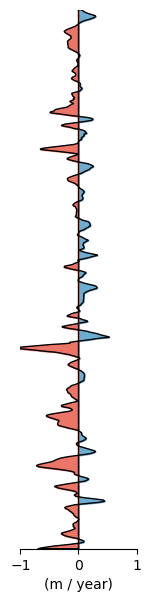

In [16]:
# Plot negative rates in red, positive in blue
fig, ax = plt.subplots(figsize=(1.5, 7))
ax.fill_betweenx(
    ratesofchange_positive_gdf.index, 0, ratesofchange_positive_gdf, color="#6caed1"
)
ax.fill_betweenx(
    ratesofchange_negative_gdf.index, ratesofchange_negative_gdf, 0, color="#eb7668"
)
ax.plot(
    ratesofchange_rolling_gdf["rate_time"],
    ratesofchange_rolling_gdf.index,
    color="black",
    linewidth=1,
)

# Add vertical axis line
ax.axvline(0, color="black", linewidth=1)

# Styling
ax.set_xlim(-1, 1)
ax.set_ylim(min_coord, max_coord)
ax.set_xticks(ticks=[-1, 0, 1])
ax.set_xlabel("(m / year)")
ax.spines[["top", "left", "right"]].set_visible(False)
ax.tick_params(top=False, left=False, labelleft=False, labeltop=False)

# Export
# fig.savefig("/home/jovyan/dev/dea-notebooks/Testing/all_time_all_GBR_mngt_areas.png", bbox_inches="tight", transparent=True)